In [331]:
## PROJECT START!!! Random forest classifier to predict House pricings

In [332]:
!pip install seaborn

In [333]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [334]:
#collumns to drop = date, 

In [335]:
house_data = pd.read_csv('king_ country_ houses_aa.csv')


In [336]:
house_data.shape

(21613, 21)

In [337]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [338]:
house_data.fillna(method='ffill', inplace=True)

C:\Users\vigus\AppData\Local\Temp\ipykernel_12104\2155536620.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_data.fillna(method='ffill', inplace=True)


In [339]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [340]:
print(house_data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [341]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [342]:
print(house_data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [343]:
house_data.head(12)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [344]:
# Convert the 'date' column to datetime format
house_data['date'] = pd.to_datetime(house_data['date'], errors='coerce')

house_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [345]:
#Drop or transform lot features
house_data["log_lot"] = np.log1p(house_data["sqft_lot"])
house_data["log_lot15"] = np.log1p(house_data["sqft_lot15"])

In [346]:
#Convert yr_renovated to binary
if "yr_renovated" in house_data.columns:
    house_data["renovated"] = (house_data["yr_renovated"] > 0).astype(int)
    house_data.drop("yr_renovated", axis=1, inplace=True)
else:
    print("Column 'yr_renovated' not found. Available columns:", list(house_data.columns))

In [347]:
#Remove noisy engineered features


In [348]:
# House age
house_data["age"] = 2015 - house_data["yr_built"]

In [349]:
# Bath per bedroom (avoid division by zero)
house_data["bath_per_bed"] = (
    house_data["bathrooms"] /
    house_data["bedrooms"].replace(0, np.nan))

house_data["living_ratio"] = (
    house_data["sqft_living"] /
    house_data["sqft_lot"].replace(0, np.nan))


log_lot15        0.019695
sqft_lot15       0.019327
bath_per_bed     0.018719
view             0.017544
log_lot          0.016967
sqft_lot         0.016476
floors           0.016219
bedrooms         0.013181
zipcode

In [350]:
# Drop columns i don't want 
house_data_cleaned = house_data.drop(['id','date','log_lot15','sqft_lot15', 'bath_per_bed', 'view', 'log_lot', 'sqft_lot', 'floors', 'bedrooms','zipcode'],axis=1)

In [351]:
num_cols = ["price","sqft_living","sqft_above","sqft_basement","sqft_living15"]
for c in num_cols:
    house_data_cleaned = house_data_cleaned[house_data_cleaned[c] < house_data_cleaned[c].quantile(0.99)]

In [352]:
house_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20536 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20536 non-null  float64
 1   bathrooms      20536 non-null  float64
 2   sqft_living    20536 non-null  int64  
 3   waterfront     20536 non-null  int64  
 4   condition      20536 non-null  int64  
 5   grade          20536 non-null  int64  
 6   sqft_above     20536 non-null  int64  
 7   sqft_basement  20536 non-null  int64  
 8   yr_built       20536 non-null  int64  
 9   lat            20536 non-null  float64
 10  long           20536 non-null  float64
 11  sqft_living15  20536 non-null  int64  
 12  renovated      20536 non-null  int64  
 13  age            20536 non-null  int64  
 14  living_ratio   20536 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


In [353]:
# Handle infinities and NaNs
house_data_cleaned = house_data_cleaned.replace([np.inf, -np.inf], np.nan)

# Fill numeric NaNs with median of each column
house_data_cleaned = house_data_cleaned.fillna(house_data_cleaned.median(numeric_only=True))


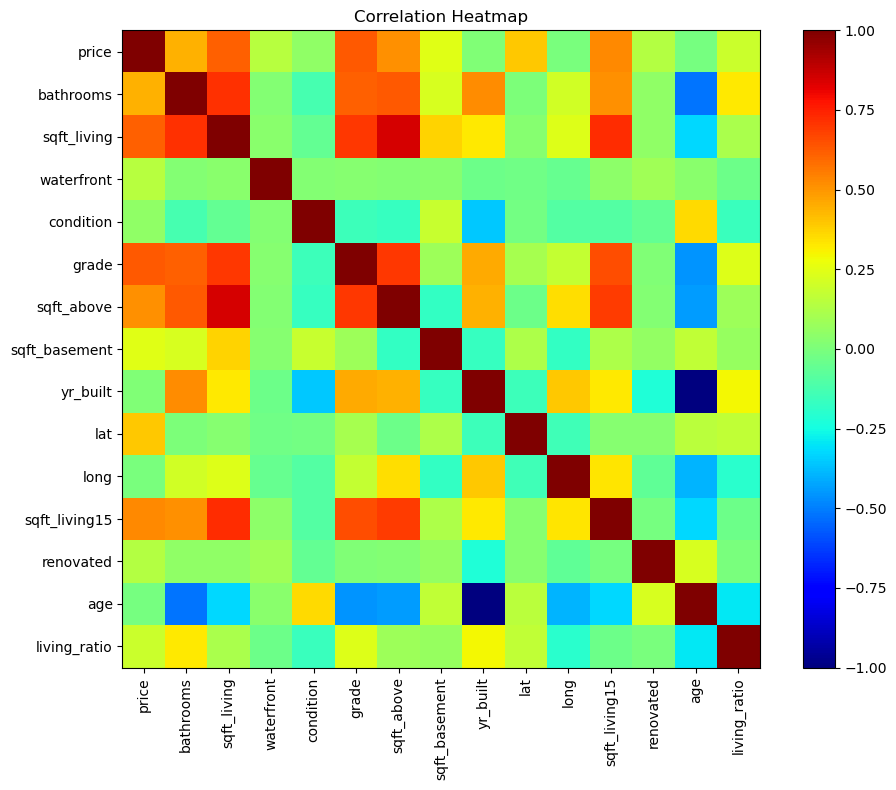

In [354]:
#Correlation heatmap
correlation = house_data_cleaned.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Model on the train data

We will start building our model using different regression models

In [355]:
# X(Independent variables) and y(target variables) 
y = np.log1p(house_data_cleaned["price"])  
X = house_data_cleaned.drop(columns=["price"], errors="ignore")

print("Final feature columns:", X.columns)
print("Number of features:", X.shape[1])

Final feature columns: Index(['bathrooms', 'sqft_living', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'renovated', 'age', 'living_ratio'],
      dtype='object')
Number of features: 14


In [356]:
#Encode zipcode
if "zipcode" in X.columns:
    X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

In [357]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [358]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [359]:
# RandomForestRegressors
model = RandomForestRegressor(
    n_estimators=800,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=4,
    max_features=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Train the model
y_pred_log = model.predict(X_test)

# Convert predictions back to real prices
y_pred = np.expm1(y_pred_log)

# Convert ground truth back to real prices too
y_test_real = np.expm1(y_test)

# Remove any inf / nan that may appear
import numpy as np

mask = np.isfinite(y_pred) & np.isfinite(y_test_real)

y_pred = y_pred[mask]
y_test_real = y_test_real[mask]

# Now compute metrics safely
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred)

print("\n=== RandomForestRegressor Performance ===")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


=== RandomForestRegressor Performance ===
MSE : 8988373363.432673
RMSE: 94807.0322467309
R²  : 0.8491315430228875


In [360]:
# Feature importance
feature_importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importances.head(20))


Top 20 Most Important Features:
lat              0.375798
sqft_living      0.190967
grade            0.162338
sqft_living15    0.060978
long             0.051107
sqft_above       0.042434
living_ratio     0.035049
yr_built         0.023157
age              0.022926
bathrooms        0.013592
sqft_basement    0.007898
condition        0.006760
waterfront       0.005692
renovated        0.001303
dtype: float64


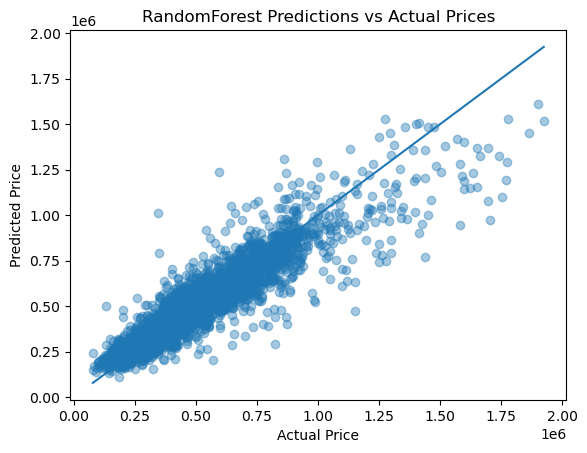

In [361]:
plt.figure()
plt.scatter(y_test_real, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("RandomForest Predictions vs Actual Prices")
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()])
plt.show()

In [362]:
# Rsquared cross validation
from sklearn.model_selection import cross_val_score

# Rsquared cross validation
scores = cross_val_score(model, X, y, cv=5, scoring="r2", n_jobs=-1)

print("CV R² scores:", scores)
print("CV Mean R²:", scores.mean())

CV R² scores: [0.86543373 0.85809431 0.86372529 0.86333398 0.86926615]
CV Mean R²: 0.8639706897948065


In [363]:
print("RMSE / mean price:", rmse / y_test_real.mean())

RMSE / mean price: 0.19356161683757514


In [364]:
sample_house = X_test.iloc[0:1]
predicted_price = np.expm1(model.predict(sample_house))[0]

print("Predicted price:", round(predicted_price, 2))
print("Actual price   :", round(y_test_real.iloc[0], 2))


Predicted price: 401333.82
Actual price   : 538250.0


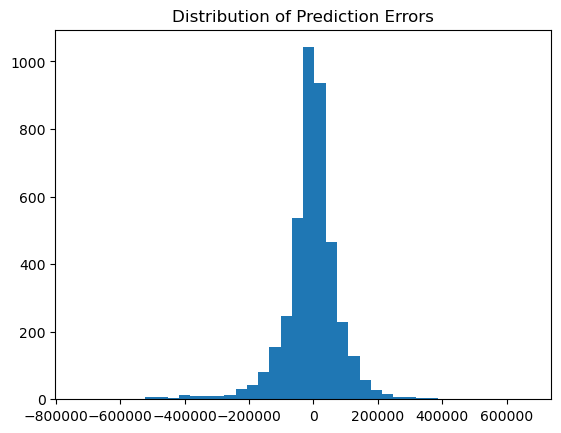

In [365]:
errors = y_pred - y_test_real
plt.hist(errors, bins=40)
plt.title("Distribution of Prediction Errors")
plt.show()

In [367]:
for depth in [8, 10, 12]:
    for lr in [0.03, 0.05, 0.08]:
        gb = HistGradientBoostingRegressor(
            max_depth=depth,
            learning_rate=lr,
            max_iter=400,
            min_samples_leaf=20,
            random_state=42
        )
        gb.fit(X_train, y_train)
        pred = np.expm1(gb.predict(X_test))
        rmse = np.sqrt(mean_squared_error(y_test_real, pred))
        print(f"depth={depth}, lr={lr} -> RMSE={rmse:.0f}")

depth=8, lr=0.03 -> RMSE=87722
depth=8, lr=0.05 -> RMSE=86890
depth=8, lr=0.08 -> RMSE=86310
depth=10, lr=0.03 -> RMSE=87752
depth=10, lr=0.05 -> RMSE=86598
depth=10, lr=0.08 -> RMSE=87560
depth=12, lr=0.03 -> RMSE=87897
depth=12, lr=0.05 -> RMSE=87366
depth=12, lr=0.08 -> RMSE=87753


In [368]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ===== 1. Prepare X and y (LOG TARGET) =====
# Use your cleaned dataframe
y = np.log1p(house_data_cleaned["price"])
X = house_data_cleaned.drop(columns=["price"], errors="ignore")

# One-hot encode zipcode if still present
if "zipcode" in X.columns:
    X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

# ===== 2. Train / Test Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 3. Gradient Boosting Model =====
gb = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.08,
    max_iter=500,
    min_samples_leaf=20,
    l2_regularization=0.0,
    random_state=42
)

# ===== 4. Train =====
gb.fit(X_train, y_train)

# ===== 5. Predict (inverse log) =====
y_pred_log = gb.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# ===== 6. Evaluate =====
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_real, y_pred)
r2 = r2_score(y_test_real, y_pred)

print("=== Gradient Boosting Performance ===")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R² :", r2)


=== Gradient Boosting Performance ===
MSE : 7449497488.8354845
RMSE: 86310.47149005435
MAE : 56275.000639762795
R² : 0.8749613366120489



=== Gradient Boosting Evaluation ===
MSE : 7449497488.8354845
RMSE: 86310.47149005435
MAE : 56275.000639762795
R²  : 0.8749613366120489

Average error: -4873.099555723941
Median error : -1998.690510333312
Max overprice: 601251.4463956811
Max underprice: -627296.4735917149


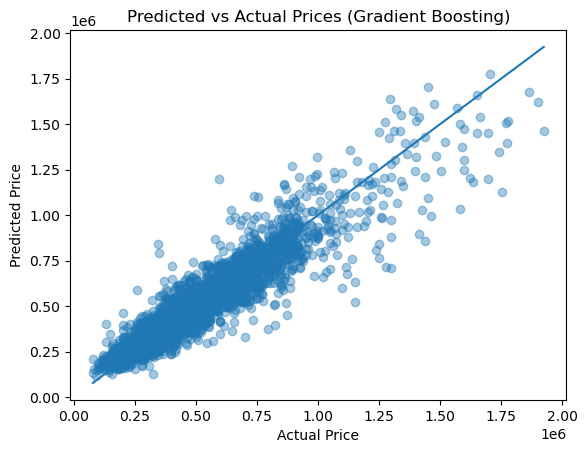

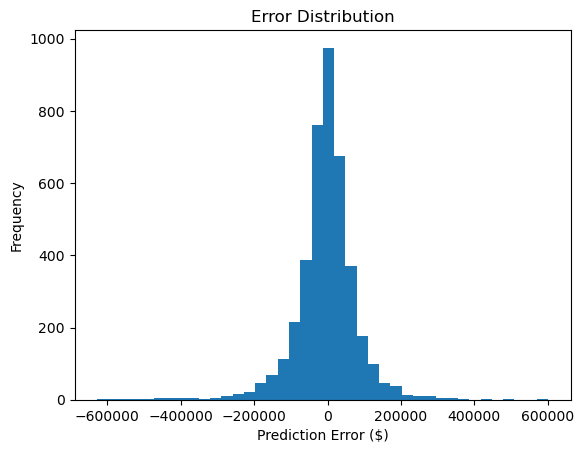

In [369]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ===== Metrics =====
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_real, y_pred)
r2 = r2_score(y_test_real, y_pred)

print("\n=== Gradient Boosting Evaluation ===")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

# ===== Error analysis =====
errors = y_pred - y_test_real

print("\nAverage error:", np.mean(errors))
print("Median error :", np.median(errors))
print("Max overprice:", np.max(errors))
print("Max underprice:", np.min(errors))


# ===== PLOT: Actual vs Predicted =====
plt.figure()
plt.scatter(y_test_real, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices (Gradient Boosting)")
plt.plot(
    [y_test_real.min(), y_test_real.max()],
    [y_test_real.min(), y_test_real.max()]
)
plt.show()


# ===== PLOT: Error distribution =====
plt.figure()
plt.hist(errors, bins=40)
plt.xlabel("Prediction Error ($)")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

In [373]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Target (LOG PRICE)
y = np.log1p(house_data_cleaned["price"])
X = house_data_cleaned.drop(columns=["price"])

# Encode zipcode if needed
if "zipcode" in X.columns:
    X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [375]:
# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=6,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# Gradient Boosting
gb = HistGradientBoostingRegressor(
    max_depth=10,
    learning_rate=0.05,
    max_iter=500,
    min_samples_leaf=20,
    random_state=42
)

gb.fit(X_train, y_train)


HistGradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_iter=500,
                              random_state=42)

In [376]:
# Take one house from test set
sample = X_test.iloc[[0]]

# Predict log-price
rf_log = rf.predict(sample)
gb_log = gb.predict(sample)

# Convert back to dollars
rf_price = np.expm1(rf_log)[0]
gb_price = np.expm1(gb_log)[0]

actual_price = np.expm1(y_test.iloc[0])

print("Actual price:", round(actual_price, 2))
print("Random Forest prediction:", round(rf_price, 2))
print("Gradient Boosting prediction:", round(gb_price, 2))


Actual price: 538250.0
Random Forest prediction: 405865.77
Gradient Boosting prediction: 437037.01
